# State of Data Science for Health In Africa   

This notebook contains the processing of the data from the WHO [Global Observatory on Health R&D](https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring) for the publication of the State of Data Science for Health in Africa from the [NIH collection](https://www.fic.nih.gov/About/center-global-health-studies/Pages/state-of-data-science-for-health-in-africa.aspx) with a focus on drug discovery and infectious diseases.

Please see terms of [use](https://cdn.who.int/media/docs/default-source/global-observatory-on-health-r-d/global-rd-observatory-conditions-of-use.pdf?sfvrsn=8b89e836_4)

In [1]:
import pandas as pd
import os
import textwrap

import stylia as st
from stylia import NamedColors
from stylia import ContinuousColorMap
from stylia import TWO_COLUMNS_WIDTH

DATAPATH = "../data/global_obs_health"


named_colors = NamedColors()
red = named_colors.get('red')
blue = named_colors.get('blue')
gray = named_colors.get('gray')

In [5]:
import palettable
palettable.cartocolors.qualitative.Prism_9.hex_colors

['#5F4690',
 '#1D6996',
 '#38A6A5',
 '#0F8554',
 '#73AF48',
 '#EDAD08',
 '#E17C05',
 '#CC503E',
 '#94346E']

In [6]:
colors = ['#5F4690','#1D6996', '#38A6A5', '#0F8554', '#73AF48', '#EDAD08', '#E17C05', '#CC503E','#94346E']

## Capacity for research

### Funding

The funding landscape is limited in scope, and it shows over 50% of the funds for neglected disease research go to the US, which might be an overtstatement. No funding in Africa - this is not correct: https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/distribution-of-r-d-funding-flows-for-neglected-diseases-by-country-funder-recipient-organization.

We can use the [number of grants](https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/number-of-grants-for-biomedical-research-by-funder-type-of-grant-duration-and-recipients) by recipient's WHO region and income group from the 10 major funders, selecting "communicable, maternal and neonatal conditions"


<BarContainer object of 6 artists>

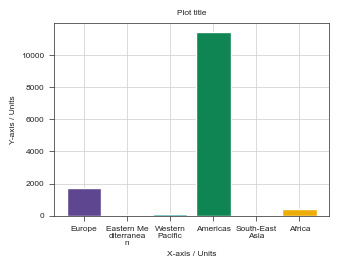

In [33]:
data = {"Europe":1742,
       "Eastern Mediterranean": 18,
       "Western Pacific": 78,
       "Americas": 11407,
       "South-East Asia": 32,
       "Africa": 391}

fig, axs = st.create_figure(1,1, width=(TWO_COLUMNS_WIDTH/2), height=2.5)
ax = axs[0]
x = [textwrap.fill(label, 10) for label in data.keys()]
ax.bar(x, data.values(), color=colors[:7])

### Researchers

We use the measurement of FTE per million inhabitants of health researchers aggregated by WHO region (82 countries in total analysed). Data from [March 2023](https://www.who.int/observatories/global-observatory-on-health-research-and-development/indicators/health-researchers-in-full-time-equivalent-per-million-inhabitants-by-who-region-first-set-of-charts). Data expressed in weighted average of FTE per million population

Africa has significantly fewer researchers, yet most of its researchers are actually [focused on health](https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/health-researchers-in-full-time-equivalent-as-a-proportion-of-all-researchers)

<BarContainer object of 6 artists>

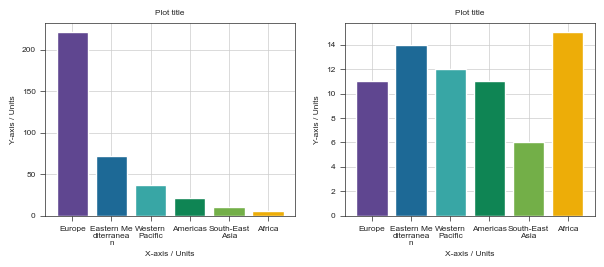

In [10]:
fte = {"Europe":221,
       "Eastern Mediterranean": 72,
       "Western Pacific": 37,
       "Americas": 21,
       "South-East Asia": 10,
       "Africa":6}

perc_health = {"Europe":11,
       "Eastern Mediterranean": 14,
       "Western Pacific": 12,
       "Americas": 11,
       "South-East Asia": 6,
       "Africa":15}

fig, axs = st.create_figure(1,2, width=(TWO_COLUMNS_WIDTH), height=2.5)
ax = axs[0]
x = [textwrap.fill(label, 10) for label in fte.keys()]
ax.bar(x, fte.values(), color=colors[:7])
ax = axs[1]
x = [textwrap.fill(label, 10) for label in perc_health.keys()]
ax.bar(x, perc_health.values(), color=colors[:7])

### Research institutions

Higher education institutions offering health-related disciplines. [Data](https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/worldwide-status-of-higher-education-institutions-offering-disciplines-related-to-research-for-health) from 2023 available for 182 countries, expressed as weighted average per million population

<BarContainer object of 6 artists>

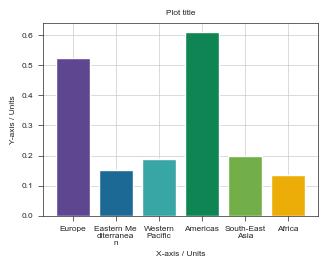

In [32]:
data = {"Europe":0.5244,
       "Eastern Mediterranean": 0.1517,
       "Western Pacific": 0.1879,
       "Americas": 0.6095,
       "South-East Asia": 0.1979,
       "Africa": 0.1346}

fig, axs = st.create_figure(1,1, width=(TWO_COLUMNS_WIDTH/2), height=2.5)
ax = axs[0]
x = [textwrap.fill(label, 10) for label in data.keys()]
ax.bar(x, data.values(), color=colors[:7])

## Research Outputs

### Scientific publications

[Publications](https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/trends-and-volume-of-peer-reviewed-publications-for-neglected-diseases-and-r-d-blueprint-pathogens) related to WHO list of neglected tropical diseases and R&D Blueprint pathogens, plus malaria, tuberculosis and HIV/AIDS. I don't know how to get the data, though publications by country are actually appearing

### Antimicrobials in the pipeline

Antimicrobials being developed in [preclinical stages](https://www.who.int/observatories/global-observatory-on-health-research-and-development/monitoring/who-antibacterial-preclinical-pipeline-review)

<BarContainer object of 6 artists>

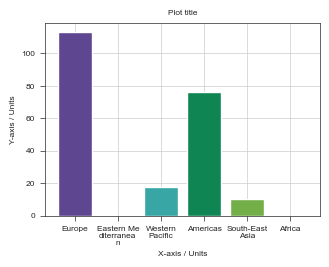

In [31]:
df = pd.read_excel(os.path.join(DATAPATH, "who_preclinical_antibacterial_products_data_2022.xlsx"), sheet_name="PreclinicalAntibacterialProduct")
df.columns
df_ = df.groupby("WHO region").nunique()
data={}
for i,row in df_.iterrows():
    data[i] = row["Unique identifier number"]
data["Africa"] = 0
data["Eastern Mediterranean"] = 0 

order = ["Europe", "Eastern Mediterranean", "Western Pacific", "Americas", "South-East Asia", "Africa"]
data = {k: data[k] for k in order if k in data}

fig, axs = st.create_figure(1,1, width=(TWO_COLUMNS_WIDTH/2), height=2.5)
ax = axs[0]
x = [textwrap.fill(label, 10) for label in data.keys()]
ax.bar(x, data.values(), color=colors[:7])

## Infectious vs non communicable
We can plto several statistics of the resources going into communicable vs non communicable diseases